<a href="https://colab.research.google.com/github/gibranfp/CursoDatosMasivosI/blob/main/notebooks/4g_kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. *Kafka* con *Python*
                                                    
En este notebook haremos una introducción a *Kafka* y como podemos usarlo en conjunto con *Python*.

## 6.1 Introduccion

### 6.1.1 Que es *Kafka*?

*Kafka* es una propuesta para mitigar estos problemas en los proyectos de software. *Kafka* es una plataforma distribuida de transmisión de datos que permite publicar, almacenar y procesar flujos de registros, y suscribirse a ellos, en tiempo real. Está diseñada para manejar flujos de datos de varias fuentes y distribuirlos a los diversos usuarios. *Kafka* es un proyecto de código abierto desarrollado por LinkedIn y donado a la Apache Software Foundation escrito en Java y Scala. 

Algunas ventajas que ofrece *Kafka* en comparacion a otras opciones para el manejo de datos mas tradicionales (bases de datos) son las siguientes:

* Grantiza un procesamiento rapido y fluido de datos.
* Facil escalabilidad.
* Toleran fallos.
* Pueden manejar escritura y lectura de datos de alta frecuencia.
* Unifica los canales de datos entre microservicios (contenedores).
* Compatibilidad con *legacy systems*.

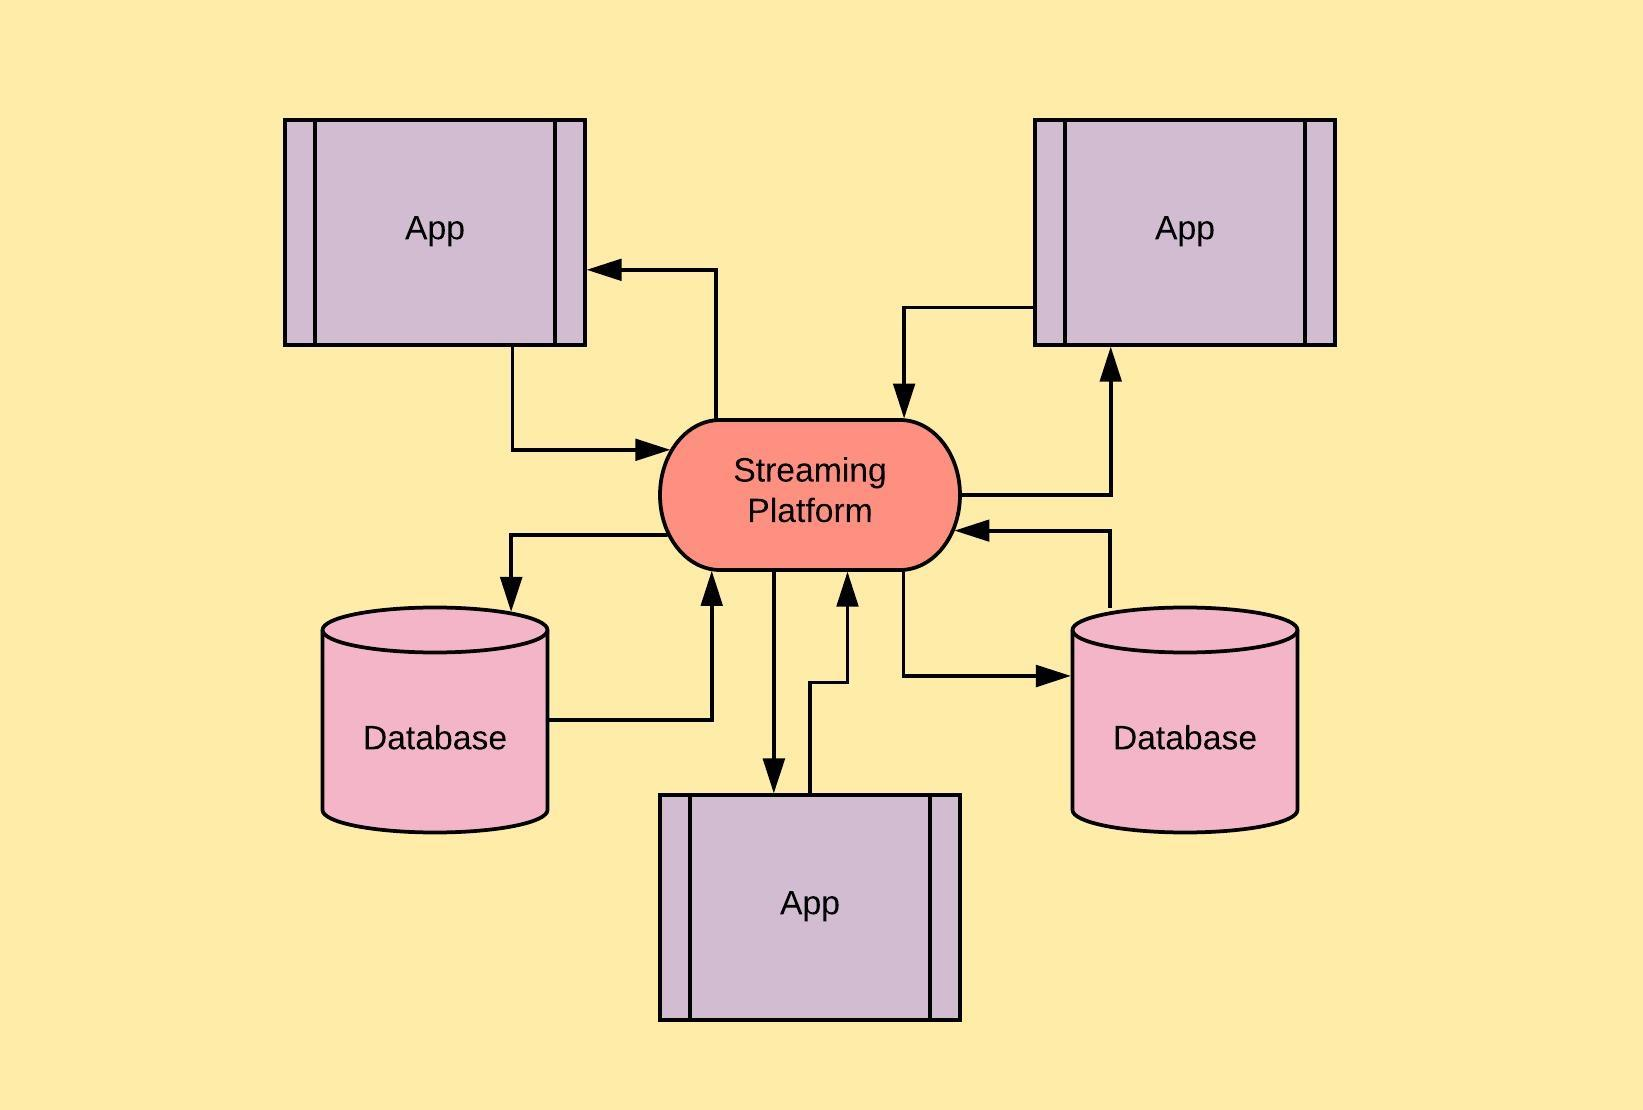

### 6.1.2 Conceptos de *Kafka*

1. **Topics**: Cada evento (dato) que llega al sistema debe ser parte de un topic. Un topic es una flujo de registros, los cuales se guardan en forma formato `(llave, valor)`.

2. **Producers**: Son las *apps* o microservicios que que **publican** datos en el sistema de *Kafka*. **Publican** datos en los *topics* de su eleccion. 

3. **Consumers**: Las *apps* o microservicios que usan los datos publicados por los *producers* son llamados *consumers*. Se dice que un *consumer* se **suscribe** a un *topic* para consumir sus datos. 

4. **Broker**: Un *cluster* de *Kafka* se consiste de varios servidores en los cuales corre *Kafka*, a estos servidores se les conoce como *brokers*. Los datos de un *topic* son replicados y particionados en varios *brokers*, los cual permite a los *consumers* leer datos en paralelo y tolerar fallos.

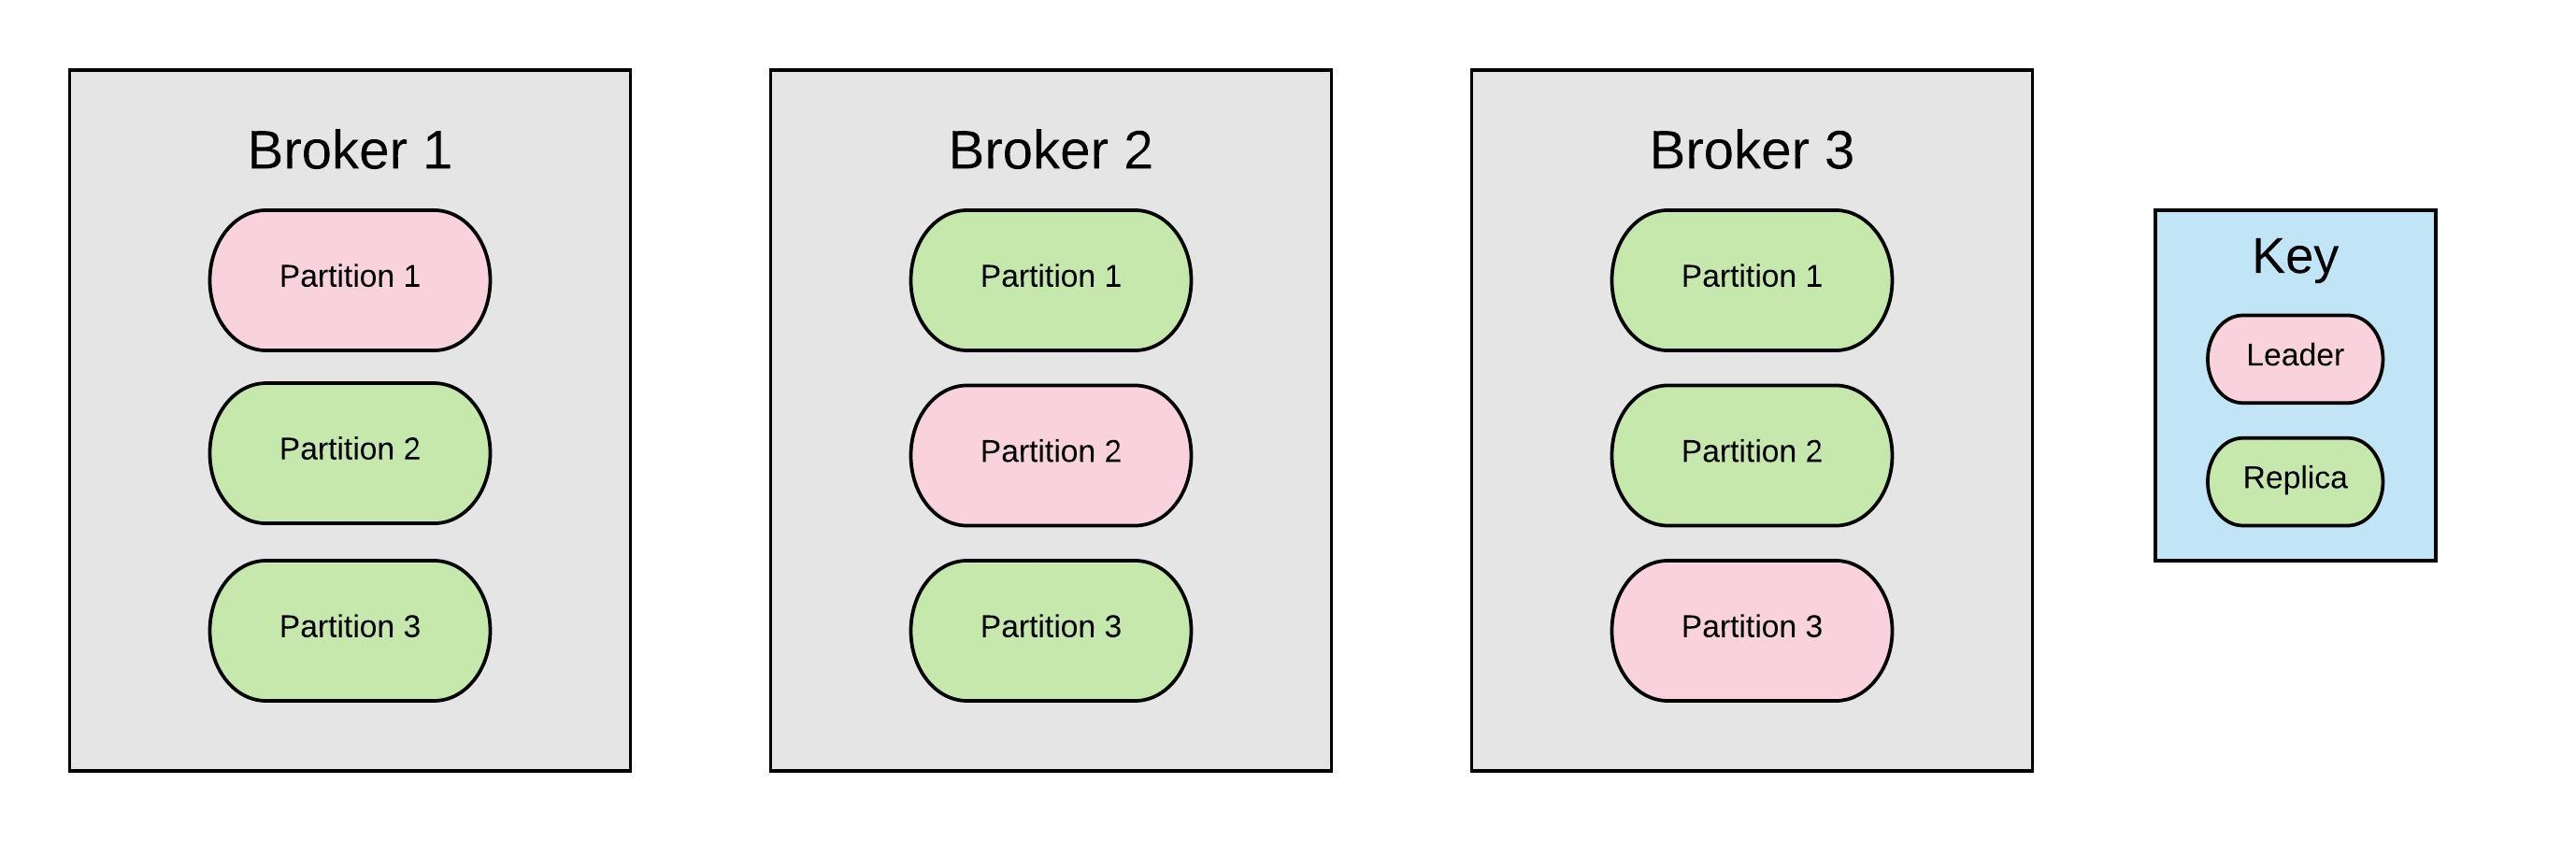

Para mas informacion puede referise [aqui](https://www.youtube.com/watch?v=FKgi3n-FyNU) y [aqui](https://kafka.apache.org/documentation/).

## 6.2 Instalacion de *Kafka*

En esta seccion haremos un recorrido de como instala y preparar *Kafka* para su su uso. Por razones pedagogicas estamos haciendo esto en un *Notebook*, en la vida real esto debe correrse en la terminal. El codigo para realizar cada paso es diferente aqui porque lo estamos corriendo en un Notebook, para ver la instalacion *normal* puede referirse [aqui](https://kafka.apache.org/quickstart).

### Paso 1

Descargamos y extraemos *Kafka*


In [1]:
!curl -sSOL https://downloads.apache.org/kafka/2.8.0/kafka_2.13-2.8.0.tgz
!tar -xzf kafka_2.13-2.8.0.tgz

### Paso 2

Primero debemos inicializar un servidor de *ZooKeeper*, el cual es un servio que usar *Kafka* para administrar los *brokers*. Posteriormente inicializamosun servidor de *Kafka*.

In [2]:
# Servidor de ZooKeeper
!./kafka_2.13-2.8.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-2.8.0/config/zookeeper.properties
# Servidor de Kafka
!./kafka_2.13-2.8.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-2.8.0/config/server.properties

**NOTA: LA DOCUMENTACION MENCIONA QUE ZOOKEEPER PRONTO NO SERA NECESARIO PARA USAR KAFKA, REVISE LA FORMA CORRECTA DE REALIZAR ESTE PROCESO EN UN FUTURO PROXIMO.**

### Paso 3

Creamos un *Topic*. En este caso al topic le llamaremos topic_ejemplo, con una sola particion y una sola replica

In [3]:
!./kafka_2.13-2.8.0/bin/kafka-topics.sh --create --zookeeper localhost:2181 --replication-factor 1 --partitions 1 --topic ejemplo

Error while executing topic command : Replication factor: 1 larger than available brokers: 0.
[2021-05-25 11:53:17,640] ERROR org.apache.kafka.common.errors.InvalidReplicationFactorException: Replication factor: 1 larger than available brokers: 0.
 (kafka.admin.TopicCommand$)


Podemos enlistar los *topics* existentes

In [4]:
!./kafka_2.13-2.8.0/bin/kafka-topics.sh --list --zookeeper localhost:2181

Tambien podemos ver los detalles de un *topic* en especifico

In [5]:
!./kafka_2.13-2.8.0/bin/kafka-topics.sh --describe --zookeeper localhost:2181 --topic ejemplo

Error while executing topic command : Topic 'ejemplo' does not exist as expected
[2021-05-25 11:53:23,440] ERROR java.lang.IllegalArgumentException: Topic 'ejemplo' does not exist as expected
	at kafka.admin.TopicCommand$.kafka$admin$TopicCommand$$ensureTopicExists(TopicCommand.scala:542)
	at kafka.admin.TopicCommand$ZookeeperTopicService.describeTopic(TopicCommand.scala:447)
	at kafka.admin.TopicCommand$.main(TopicCommand.scala:69)
	at kafka.admin.TopicCommand.main(TopicCommand.scala)
 (kafka.admin.TopicCommand$)


## 6.3 *Kafka* con *Python*

Para poder conectar *Python* con *Kafka* debemos asegurarnos que tenemos la siguiente biblioteca instalada

In [6]:
!pip install kafka-python

     |████████████████████████████████| 256kB 4.1MB/s 


Importamos los las bibliotecas de python necesarias

In [7]:
# Cosas de Kafka
from kafka import KafkaProducer
from kafka import KafkaConsumer
# Extras
from time import sleep
import numpy as np
from json import dumps, loads

### 6.3.1 *Producer*

Con la clase `KafkaProducer` podemos crear un producto en python y con el podemos mandar datos al *topic* creado



In [8]:
# Creamos el Producer
producer = KafkaProducer()

# Creamos un conjunto de datos y los mandamos al topic
for numero in range(10):
    producer.send('ejemplo', key = b'llave', value = b'valor')

### 6.3.2 Consumer

Podemos crear un *Consumer* de la siguiente manera

In [9]:
# Pedimos que consuma los datos desde el principio
consumer = KafkaConsumer('ejemplo', auto_offset_reset = 'earliest')

Ahora veamos como es que podemos extraer los datos

In [10]:
for msg in consumer:
    dato = msg
    break

Como vienen los datos?

In [11]:
dato

ConsumerRecord(topic='ejemplo', partition=0, offset=0, timestamp=1621943608863, timestamp_type=0, key=b'llave', value=b'valor', headers=[], checksum=None, serialized_key_size=5, serialized_value_size=5, serialized_header_size=-1)

Podemos extraer los campos de la siguiente manera

In [12]:
dato.topic, dato.key, dato.value

('ejemplo', b'llave', b'valor')

Notemos que la `b` indica que los datos estan en bytes. Podemos ser mas cuidadosos y codificar y decodificar los datos de forma explicita.

Hagamos un nuevo ejemplo

## 6.4 Otro ejemplo

Supongamos que nuestra aplicacion recibe datos de compras de una recauderia. Pueden venir datos de verduras, especificando la verdura comprada y la cantidad y ademas datos de frutas, especificando las fruta comprada y la cantidad comprada.

A continuacion creamos los un ejemplo de datos. La siguiente funcion genera una compra


In [13]:
def generar_compra():
  # Es verdura o fruta?
  tipo = np.random.choice(['fruta','verdura'], 1)[0]
  # Cantidad
  cantidad = np.random.randint(1, 10)
  # Cual verdura o fruta
  if tipo == 'fruta':
    fruta = np.random.choice(['manzana','pera', 'mango'], 1)[0]
    datos_compra = {'tipo': tipo, 'producto': fruta, 'cantidad': cantidad}
  else:
    verdura = np.random.choice(['lechuga','pepino', 'apio'], 1)[0]
    datos_compra = {'tipo': tipo, 'producto': verdura, 'cantidad': cantidad}

  return datos_compra

Creamos un topico 

In [14]:
!./kafka_2.13-2.8.0/bin/kafka-topics.sh --create --zookeeper localhost:2181 --replication-factor 1 --partitions 1 --topic recauderia

Created topic recauderia.


Generamos datos

In [15]:
# Especificamos como queremos codificar los valores
producer = KafkaProducer(value_serializer = lambda x: dumps(x).encode('utf-8'))

for compra in range(1000):
  # Generamos la compra
  datos_compra = generar_compra()
  # Guardamos los datos
  producer.send('recauderia', value = datos_compra)


Creamos consumer

In [16]:
# Indicamos como decodificar los valores
consumer = KafkaConsumer('recauderia',
                         auto_offset_reset='earliest',
                         value_deserializer=lambda x: loads(x.decode('utf-8')))

Veamos como se ve una muestra

In [17]:
# Contador
count = 0

for msg in consumer:
    
    valor = msg.value
    print(valor['tipo'], valor['producto'], valor['cantidad'])

    # Nos fijamos en los primeros 10 elementos
    count = count + 1
    if count == 10:
      break

verdura lechuga 7
verdura lechuga 6
fruta manzana 5
fruta manzana 1
verdura pepino 7
fruta manzana 1
verdura apio 9
fruta mango 6
fruta pera 9
verdura lechuga 3
